* Please follow the example above and call `engine.dispose()` when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
* Investigate the data, and do any necessary data cleaning.
* Explore the data and find some variables that you think would be useful in predicting house prices.
* Build your initial model using these features and estimate the parameters using OLS.


Spend up to 4 hours on this assignment. When you are done and have submitted a link to your notebook below, feel free to take a look at [this example solution](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/2.solution_simple_linear_regression_models.ipynb).

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)

#engine.dispose()

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
#df.isnull().sum() / df.isnull().count()

In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
lotfrontage      259
garagecond        81
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
bsmtexposure      38
bsmtfintype2      38
bsmtfintype1      37
bsmtcond          37
bsmtqual          37
masvnrarea         8
masvnrtype         8
electrical         1
utilities          0
dtype: int64

Only missing values are categorical. We will only be dealing with continuous values.

In [6]:
cat_cols = df.select_dtypes(['object']).columns
print(cat_cols)
print("The number of non-numerical columns is {}".format(len(cat_cols)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [7]:
cont_cols = df.select_dtypes(['int64', 'float64']).columns
print(cont_cols)
print("The number of numerical columns is {}".format(len(cont_cols)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


In [8]:
cont_cols = cont_cols.tolist()
cat_cols = cat_cols.tolist()

In [9]:
# for col in cont_vars:
#     z_scores = zscore(df[col])
#     for threshold in range(1,5):
#         print("The score threshold is: {}".format(threshold))
#         print("The indices of the outliers for {}:".format(col))
#         print(np.where(z_scores > threshold))
#         print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

NameError: name 'cont_vars' is not defined

In [10]:
# for col in cont_vars:
#     q75, q25 = np.percentile(df[col], [75, 25])
#     iqr = q75 - q25
#     for threshold in np.arange(1,5,0.5):
#         min_val = q25 - (iqr*threshold)
#         max_val = q75 + (iqr*threshold)
#         print("The score threshold is: {}".format(threshold))
#         print("Number of outliers in {} is: {}".format(col,
#             len((np.where((df[col] > max_val) 
#                           | (df[col] < min_val))[0]))
#         ))

In [13]:
# win
#df3 = df.copy()
# sqrt
#df4 = df.copy()
# log
#df5 = df.copy()

# winsorize
#for col in cont_vars:
#    df3.loc[:, col] = winsorize(df3.loc[:, col], (0, 0.1)) # what percentile to use? this eliminated all outliers
    
# square root
#for col in cont_vars:
#    df4.loc[:, col] = np.sqrt(df4.loc[:, col])

# log
#for col in cont_vars:
#    df5.loc[:, col] = np.log1p(df5.loc[:, col])

In [14]:
#df.info()

In [15]:
#df.corr()

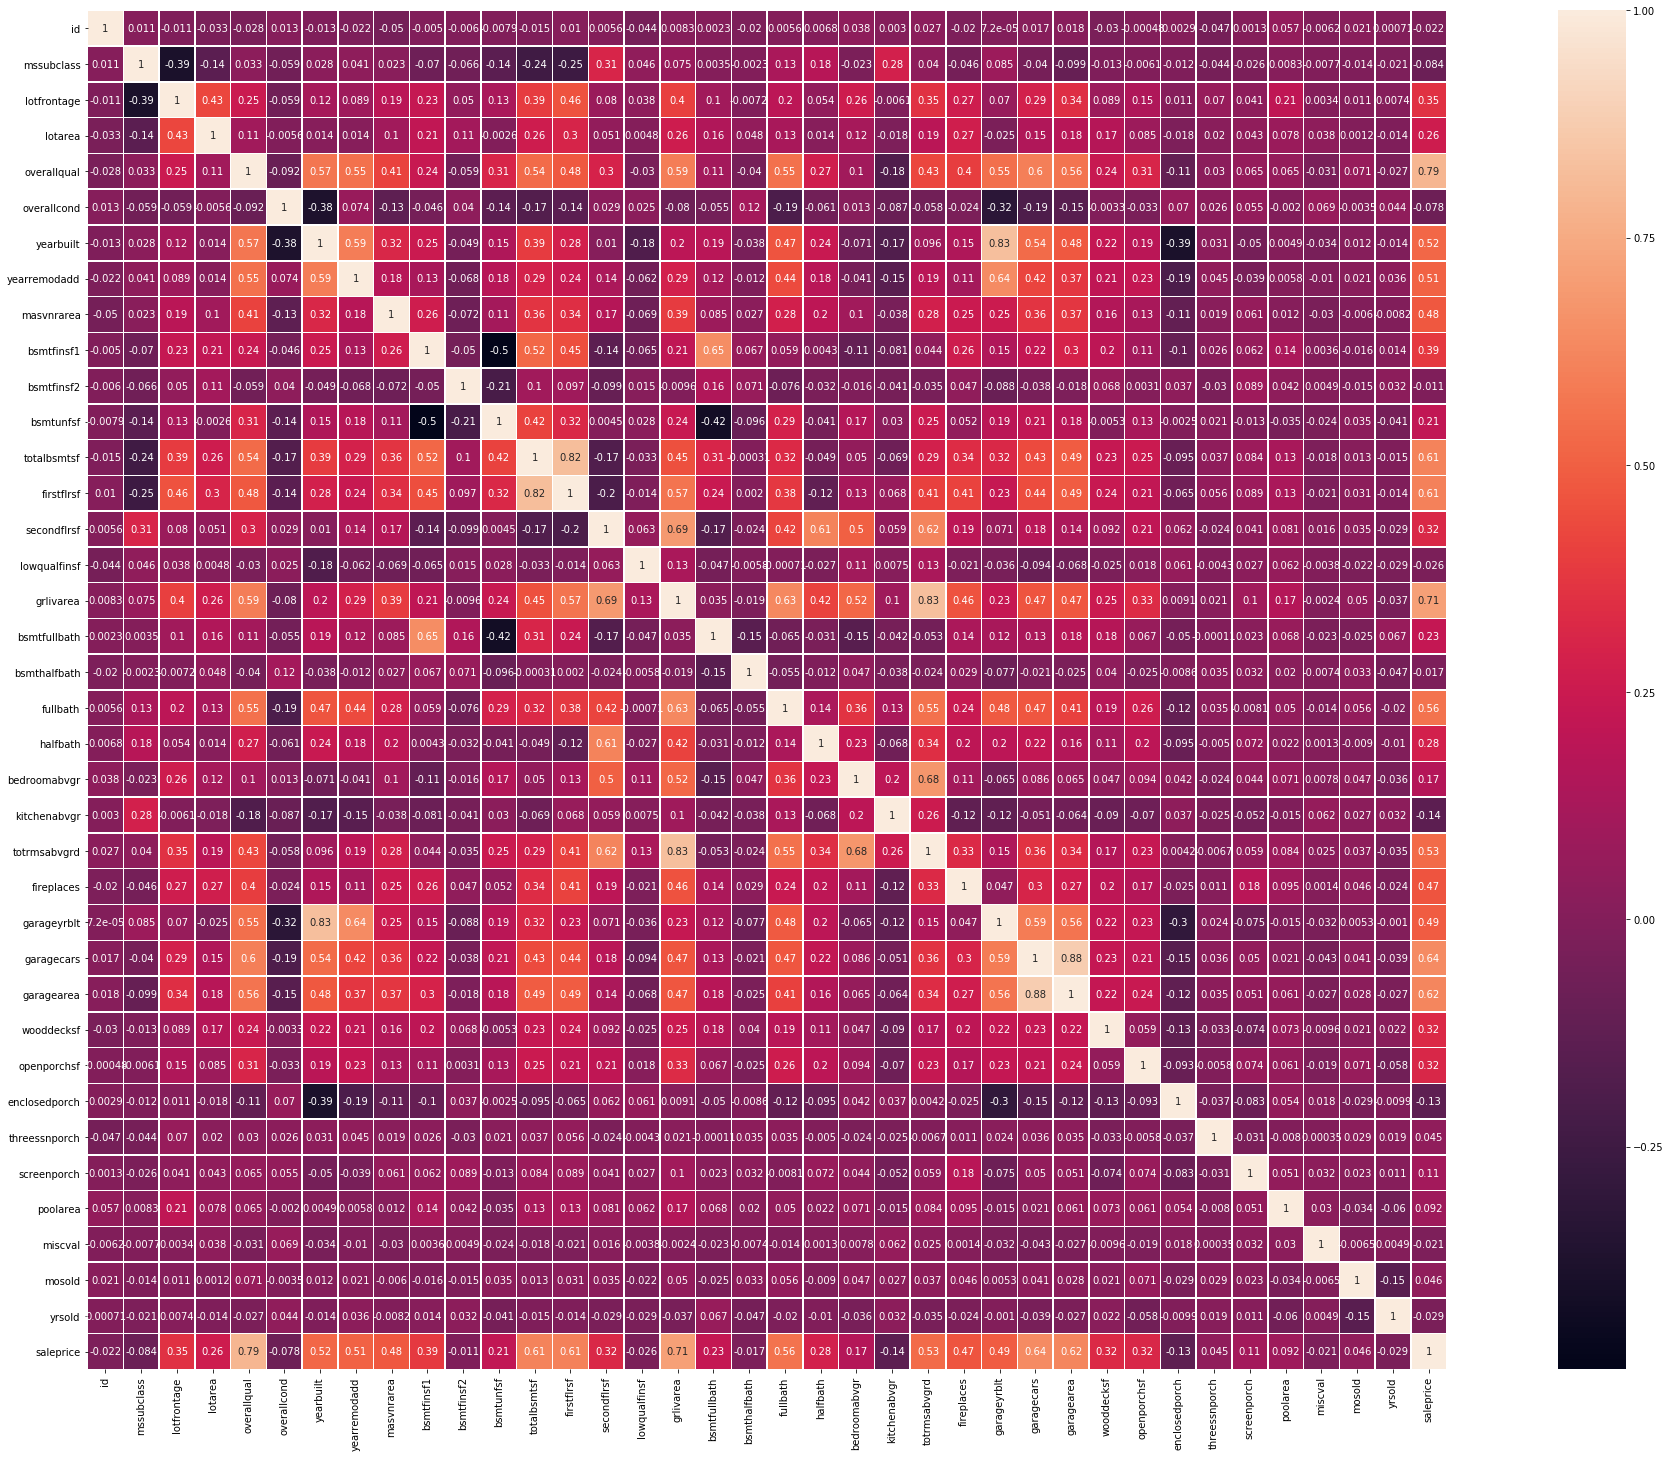

In [16]:
plt.figure(figsize=(40,25))

sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)

plt.show()

Variables most correlated (c > .10) to sale price: overallqual 79, yearbuilt 52, yearremodadd 51, totalbsmtsf 61, firstflrsf 61, grlivarea 71, fullbath 56, totrmsabvgrd 53, garagecars 64, garagearea 62

In [18]:
cont_features = ['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'garagecars', 'garagearea']

In [19]:
# cats converted to number
df2 = df.copy()

number = LabelEncoder()

for col in cat_cols:
    df2[col] = number.fit_transform(df2[col].astype('str'))

In [20]:
df2.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [21]:
cont_cols2 = cont_cols
cont_cols2.remove('saleprice')

In [22]:
#cont_cols

In [24]:
df_cat = df2.copy()

for col in cont_cols2:
    df_cat = df_cat.drop([col], axis=1)

In [25]:
#df_cat.head()

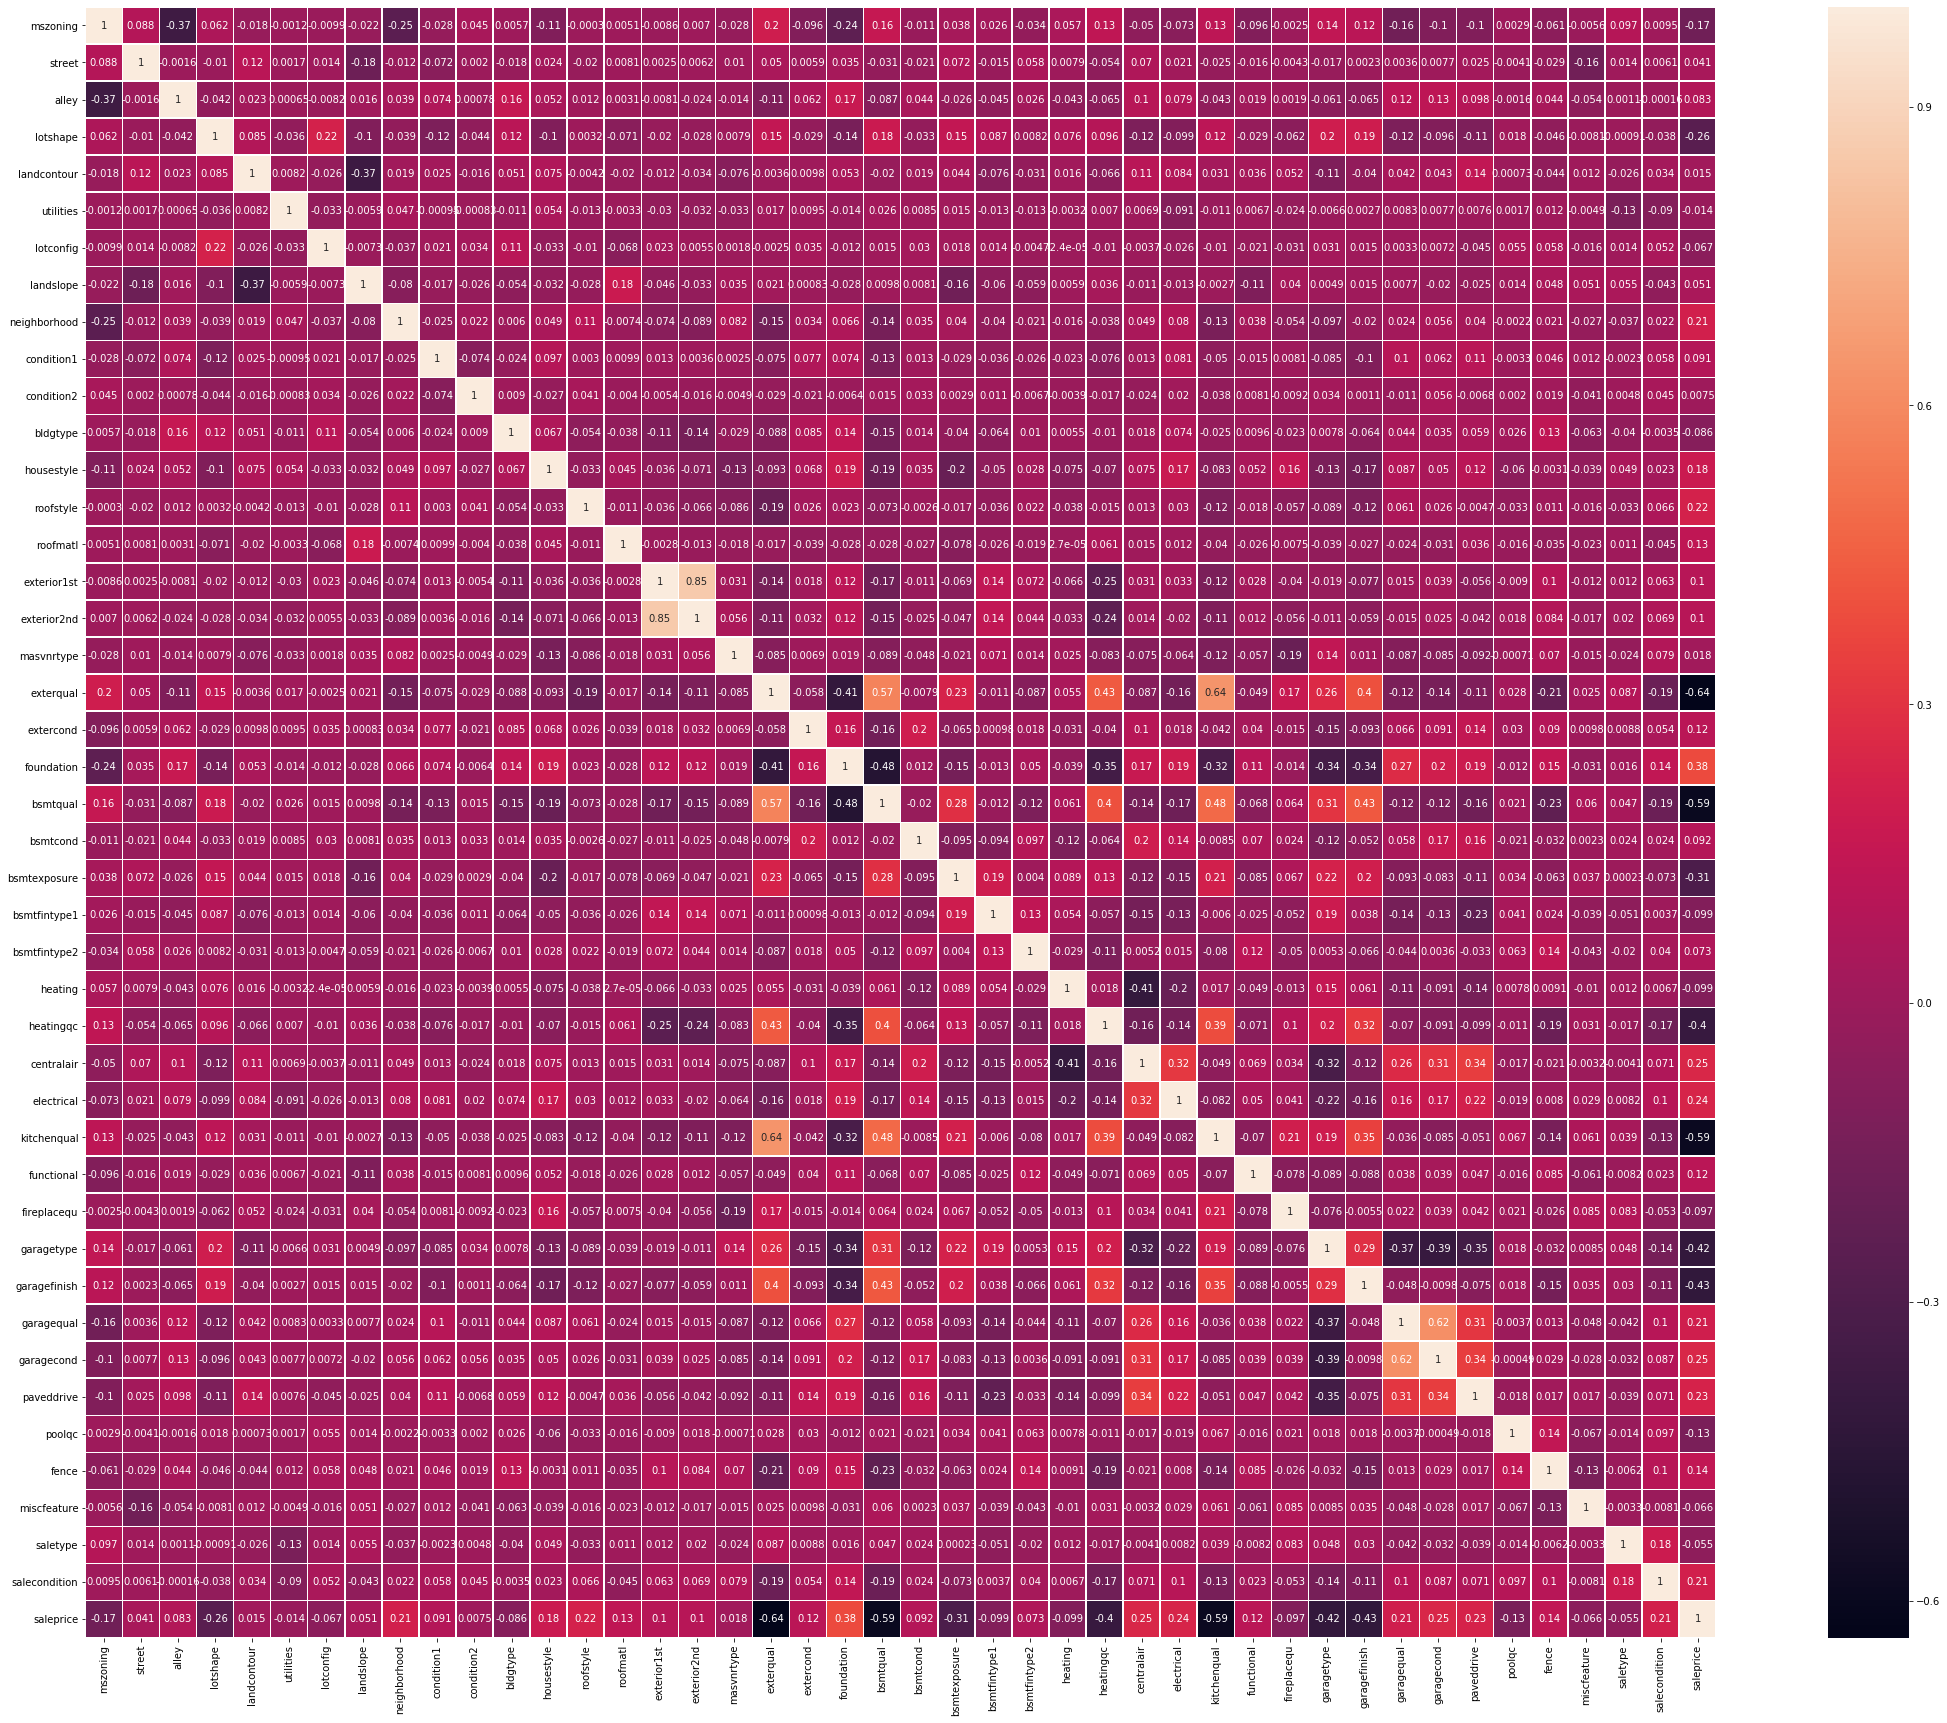

In [26]:
plt.figure(figsize=(40,30))

sns.heatmap(df_cat.corr(), square=True, annot=True, linewidths=.5)

plt.show()

None are very correlated. Let's take (c > .25): foundation 38, centralair 25, garagecond 25

Negatives? : bsmtexposure -31, exterqual -64, bsmtqual -59, bsmtexposure -31, heatingqc -40, kitchenqual -59, garagetype -42, garagefinish -43

In [27]:
cat_features = ['foundation', 'centralair', 'garagecond']

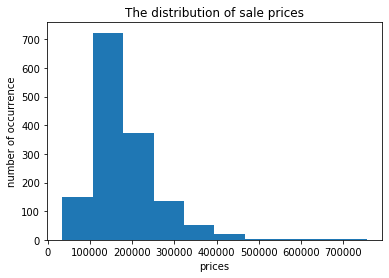

In [28]:
plt.hist(df.saleprice)
plt.title("The distribution of sale prices")
plt.xlabel("prices")
plt.ylabel("number of occurrence")
plt.show()

In [29]:
#df.head()

In [30]:
Y = df.saleprice
#X = df2[cont_features + cat_features]
X = df2[cont_features]

In [32]:
# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:23:37   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
overallqual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
yearbuilt      268.2407     50.346      5.328      0.000     169.481     367.000
yearremodadd   296.4812     63.635      4.659      0.000     171.655     421.307
totalbsmtsf     19.8651      4.295      4.625      0.000      11.439      28.291
firstflrsf      14.1737      4.930      2.875      0.004       4.504      23.844
grlivarea       51.2971      4.233     12.119      0.000      42.994      59.600
fullbath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
totrmsabvgrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
garagecars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
garagearea      14.9475     10.311      1.450      0.147      -5.279      35.174
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""